In [63]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [64]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

train_human_dir = os.path.join('/tmp/horse-or-human/humans')

test_horse_dir= os.path.join('/tmp/validation-horse-or-human/horses')
test_human_dir= os.path.join('/tmp/validation-horse-or-human/humans')

In [65]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_hames = os.listdir(test_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(test_human_dir)
print(validation_human_names[:10])

['horse3-440.png', 'horse2-383.png', 'horse2-544.png', 'horse3-541.png', 'horse5-565.png', 'horse2-254.png', 'horse2-224.png', 'horse1-000.png', 'horse5-405.png', 'horse5-360.png']
['valhuman04-13.png', 'valhuman01-23.png', 'valhuman05-19.png', 'valhuman04-17.png', 'valhuman01-14.png', 'valhuman04-08.png', 'valhuman01-12.png', 'valhuman01-02.png', 'valhuman02-18.png', 'valhuman02-24.png']


In [66]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(test_horse_dir)))
print('total validation human images:', len(os.listdir(test_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Model



In [67]:
import tensorflow as tf

In [123]:
model = tf.keras.models.Sequential([
   
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
  
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [139]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 28, 28, 16)        4624      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 14, 14, 16)      

In [124]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Data preprocessing

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [73]:
train_datagen= ImageDataGenerator(rescale=1/255)

In [100]:
train_generator= train_datagen.flow_from_directory('/tmp/horse-or-human/',
      target_size=(128,128),
      batch_size=128
      ,class_mode = 'binary')

Found 1027 images belonging to 2 classes.


In [75]:
test_datagen =ImageDataGenerator(rescale=1/255)

In [101]:
test_generator= test_datagen.flow_from_directory('/tmp/validation-horse-or-human/',
      target_size=(128,128),
      batch_size=32
      ,class_mode = 'binary')

Found 256 images belonging to 2 classes.


In [125]:
training = model.fit(train_generator,steps_per_epoch=8,
                     epochs=20,verbose=1,
                     validation_data = test_generator,
                     validation_steps=8)
                    

Epoch 1/20
8/8 [==============================] - 7s 863ms/step - loss: 0.7340 - accuracy: 0.5306 - val_loss: 0.6904 - val_accuracy: 0.7539
Epoch 2/20
8/8 [==============================] - 6s 745ms/step - loss: 0.5619 - accuracy: 0.7720 - val_loss: 0.6746 - val_accuracy: 0.5312
Epoch 3/20
8/8 [==============================] - 6s 741ms/step - loss: 0.3363 - accuracy: 0.8699 - val_loss: 0.6019 - val_accuracy: 0.8906
Epoch 4/20
8/8 [==============================] - 6s 755ms/step - loss: 0.1966 - accuracy: 0.9088 - val_loss: 0.5541 - val_accuracy: 0.8594
Epoch 5/20
8/8 [==============================] - 6s 793ms/step - loss: 0.1645 - accuracy: 0.9326 - val_loss: 0.5254 - val_accuracy: 0.8711
Epoch 6/20
8/8 [==============================] - 6s 749ms/step - loss: 0.0960 - accuracy: 0.9611 - val_loss: 0.4834 - val_accuracy: 0.8984
Epoch 7/20
8/8 [==============================] - 6s 743ms/step - loss: 0.0480 - accuracy: 0.9878 - val_loss: 0.4401 - val_accuracy: 0.9180
Epoch 8/20
8/8 [====

For predictions of your own images in colab

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

In [119]:
l = []

<Figure size 432x288 with 0 Axes>

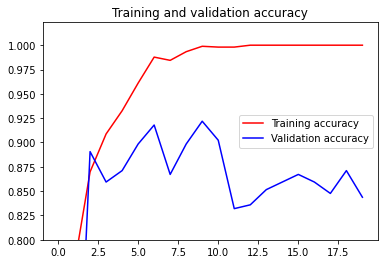

<Figure size 432x288 with 0 Axes>

In [126]:
import matplotlib.pyplot as plt
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']
loss = training.history['loss']
val_loss = training.history['val_loss']
l.append([acc[len(acc)-1],val_acc[len(val_acc)-1],loss[len(loss)-1],val_loss[len(val_loss)-1]])
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.ylim(bottom=0.8)
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [127]:
#Run data on diff models
l

[[0.996662974357605, 0.8359375, 0.00926131010055542, 2.304487705230713],
 [1.0, 0.84375, 0.0012793604983016849, 0.3971453011035919]]

In [133]:
trainPrediction = np.mean(acc)
testPrediction = np.mean(val_acc)

In [138]:
print('Train average Accuracy : {}%'.format(trainPrediction*100))
print('Validation average Accuracy : {}%'.format(testPrediction*100))

Train average Accuracy : 94.67692494392395%
Validation average Accuracy : 84.90234375%
